In [1]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%cd "D:\Imarticus\stat\veh"

D:\Imarticus\stat\veh


In [2]:
vehicle=pd.read_csv('in-vehicle-coupon-recommendation.csv')
vehicle.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
vehicle.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
vehicle.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
vehicle.car.value_counts(dropna=False)

car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

In [7]:
vehicle=vehicle.drop(['car','toCoupon_GEQ5min'],axis=1)

vehicle.car=vehicle.car.fillna('Missing')

In [8]:
vehicle.Bar.value_counts(dropna=False)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

In [9]:
vehicle.Bar=vehicle.Bar.fillna('never')

In [10]:
vehicle.CoffeeHouse.value_counts(dropna=False)

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

In [11]:
vehicle.CoffeeHouse=vehicle.CoffeeHouse.fillna('less1')

In [12]:
vehicle.CarryAway.value_counts(dropna=False)

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64

In [13]:
vehicle.CarryAway=vehicle.CarryAway.fillna('1~3')

In [14]:
vehicle.Restaurant20To50.value_counts(dropna=False)

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64

In [15]:
vehicle.Restaurant20To50=vehicle.Restaurant20To50.fillna('less1')

In [16]:
vehicle.RestaurantLessThan20.value_counts(dropna=False)

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

In [17]:
vehicle.RestaurantLessThan20=vehicle.RestaurantLessThan20.fillna('1~3')

In [18]:
vehicle.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [19]:
vehicle.Y.value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [20]:
vehicle.temperature.value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [21]:
vehicle.has_children.value_counts()

has_children
0    7431
1    5253
Name: count, dtype: int64

vehicle.toCoupon_GEQ5min.value_counts()

In [22]:
vehicle.toCoupon_GEQ15min.value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [23]:
vehicle.toCoupon_GEQ25min.value_counts()

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [24]:
vehicle.direction_same.value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [25]:
vehicle.direction_opp.value_counts()

direction_opp
1    9960
0    2724
Name: count, dtype: int64

In [26]:
vehicle.temperature=vehicle.temperature.astype('object')
vehicle.has_children=vehicle.has_children.astype('object')
# vehicle.toCoupon_GEQ5min=vehicle.toCoupon_GEQ5min.astype('object')
vehicle.toCoupon_GEQ15min=vehicle.toCoupon_GEQ15min.astype('object')
vehicle.toCoupon_GEQ25min=vehicle.toCoupon_GEQ25min.astype('object')
vehicle.direction_same=vehicle.direction_same.astype('object')
vehicle.direction_opp=vehicle.direction_opp.astype('object')

In [27]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  object
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  object
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

# EDA

<Axes: ylabel='count'>

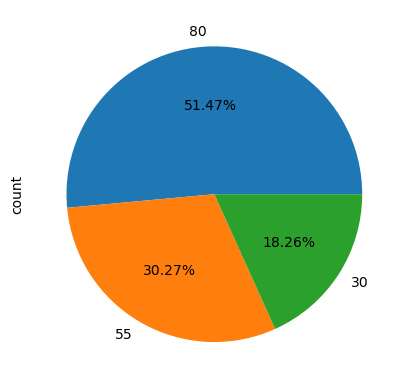

In [28]:
vehicle.temperature.value_counts().plot(kind='pie',autopct='%0.2f%%')

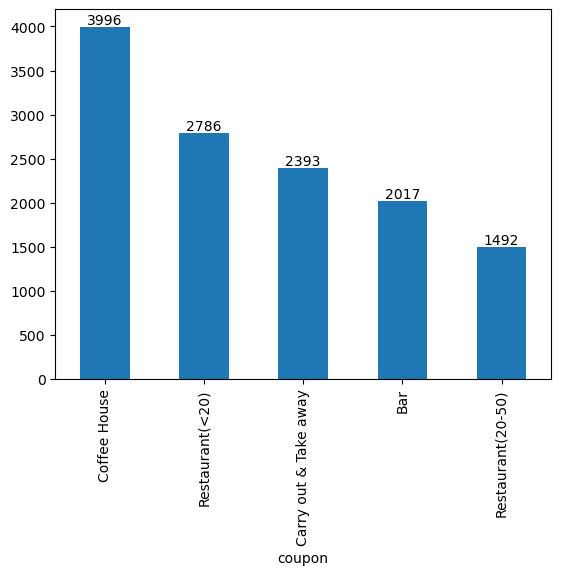

In [29]:
ax=vehicle.coupon.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='count'>

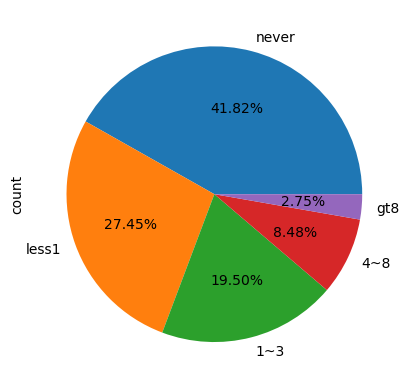

In [30]:
vehicle.Bar.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='age'>

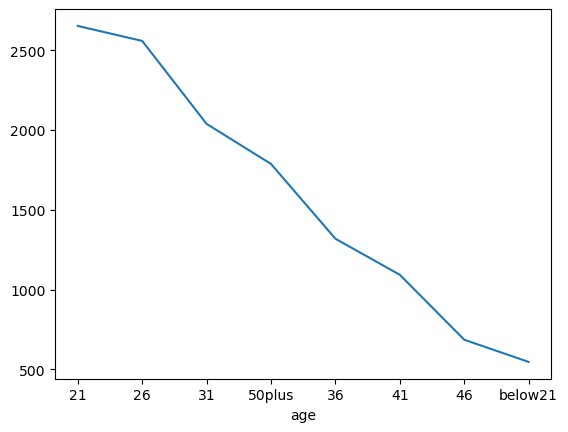

In [31]:
vehicle.age.value_counts().plot()

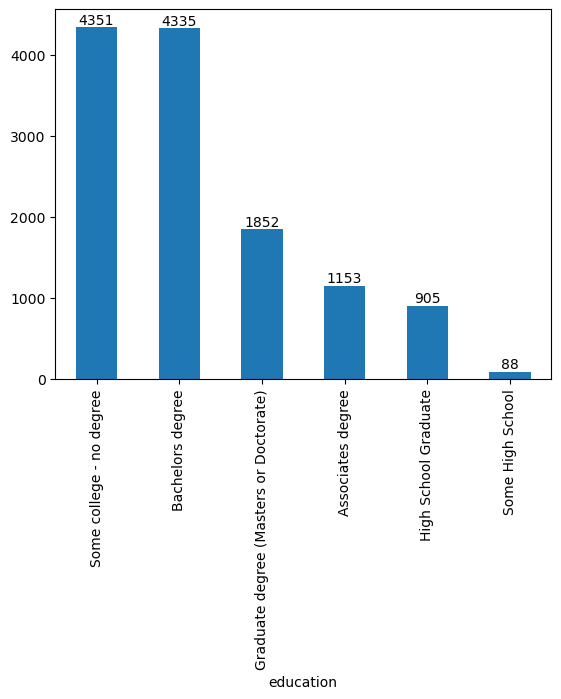

In [32]:
ax=vehicle.education.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='gender'>

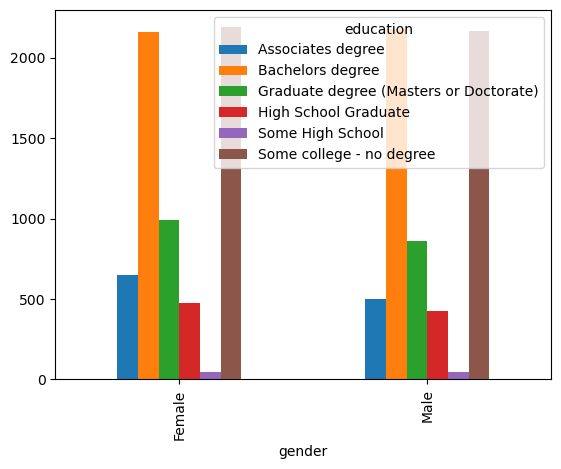

In [33]:
pd.crosstab(vehicle.gender,vehicle.education).plot(kind='bar')

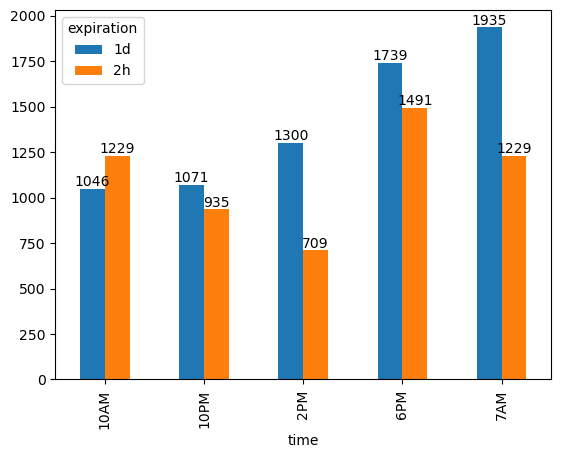

In [34]:
ax=pd.crosstab(vehicle.time,vehicle.expiration).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis testing

In [35]:
pd.crosstab(vehicle.gender,vehicle.education)

education,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree
gender,,,,,,
Female,652,2159,990,478,44,2188
Male,501,2176,862,427,44,2163


In [36]:
pd.crosstab(vehicle.time,vehicle.expiration)

expiration,1d,2h
time,,
10AM,1046,1229
10PM,1071,935
2PM,1300,709
6PM,1739,1491
7AM,1935,1229


In [37]:
pd.crosstab(vehicle.coupon,vehicle.expiration)

expiration,1d,2h
coupon,,
Bar,1556,461
Carry out & Take away,1456,937
Coffee House,1769,2227
Restaurant(20-50),956,536
Restaurant(<20),1354,1432


In [38]:
from scipy.stats import chi2_contingency

In [39]:
chi2_contingency(pd.crosstab(vehicle.coupon,vehicle.time))
# since pvalue=1.4958878106088764e-224 is leassthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=1102.093354259153, pvalue=1.4958878106088764e-224, dof=16, expected_freq=array([[ 361.7687638 ,  318.99258909,  319.4696468 ,  513.63213497,
         503.13686534],
       [ 429.2080574 ,  378.45774204,  379.02373068,  609.38111006,
         596.92935982],
       [ 716.7218543 ,  631.97540208,  632.9205298 , 1017.58751183,
         996.79470199],
       [ 267.60485651,  235.96278776,  236.31567329,  379.94008199,
         372.17660044],
       [ 499.69646799,  440.61147903,  441.27041943,  709.45916115,
         694.96247241]]))

In [40]:
chi2_contingency(pd.crosstab(vehicle.coupon,vehicle.expiration))
# since pvalue=5.450753447977153e-153 is lessthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=712.9576831151242, pvalue=5.450753447977153e-153, dof=4, expected_freq=array([[1127.60540839,  889.39459161],
       [1337.8084989 , 1055.1915011 ],
       [2233.96688742, 1762.03311258],
       [ 834.10375276,  657.89624724],
       [1557.51545254, 1228.48454746]]))

In [41]:
chi2_contingency(pd.crosstab(vehicle.gender,vehicle.education))
# since pvalue=0.00038255454739335337 is lessthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=22.715558322610352, pvalue=0.00038255454739335337, dof=5, expected_freq=array([[ 591.8624251 , 2225.2589877 ,  950.67581205,  464.5581047 ,
          45.17250079, 2233.47216966],
       [ 561.1375749 , 2109.7410123 ,  901.32418795,  440.4418953 ,
          42.82749921, 2117.52783034]]))

In [42]:
chi2_contingency(pd.crosstab(vehicle.gender,vehicle.occupation))
# since pvalue=0.0 is lessthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=1614.5302845463252, pvalue=0.0, dof=24, expected_freq=array([[ 89.8316777 , 322.88071586,  22.58625039, 279.24818669,
        123.7110533 , 722.76001261,  79.05187638, 484.06441186,
         22.07292652, 152.97051403, 125.25102491, 124.22437717,
         68.27207506, 112.4179281 ,  87.26505834, 430.16540523,
        328.01395459,  89.8316777 ,  56.46562599,  89.8316777 ,
        254.09531693, 561.06299275, 813.10501419, 111.90460423,
        959.91564175],
       [ 85.1683223 , 306.11928414,  21.41374961, 264.75181331,
        117.2889467 , 685.23998739,  74.94812362, 458.93558814,
         20.92707348, 145.02948597, 118.74897509, 117.77562283,
         64.72792494, 106.5820719 ,  82.73494166, 407.83459477,
        310.98604541,  85.1683223 ,  53.53437401,  85.1683223 ,
        240.90468307, 531.93700725, 770.89498581, 106.09539577,
        910.08435825]]))

In [43]:
chi2_contingency(pd.crosstab(vehicle.coupon,vehicle.occupation))
# since pvalue=0.9999894480826622 is greater than 0.05, fail to reject null hypothesis

Chi2ContingencyResult(statistic=48.0227031330983, pvalue=0.9999894480826622, dof=96, expected_freq=array([[ 27.82836645, 100.02309997,   6.99684642,  86.50646484,
         38.32363608, 223.89908546,  24.48896247, 149.95514033,
          6.83782718,  47.38773258,  38.80069379,  38.48265531,
         21.1495585 ,  34.82521287,  27.03327026, 133.25812047,
        101.61329234,  27.82836645,  17.49211605,  27.82836645,
         78.71452223, 173.80802586, 251.88647114,  34.66619363,
        297.36597288],
       [ 33.01600442, 118.66895301,   8.30116682, 102.63260801,
         45.46775465, 265.63733838,  29.05408389, 177.90909808,
          8.11250394,  56.22153895,  46.0337433 ,  45.65641753,
         25.09216336,  41.31717124,  32.07269   , 158.09949543,
        120.55558184,  33.01600442,  20.75291706,  33.01600442,
         93.38812677, 206.20853043, 298.84200568,  41.12850836,
        352.79959003],
       [ 55.13245033, 198.16177862,  13.86187323, 171.38315989,
         75.92526017, 4

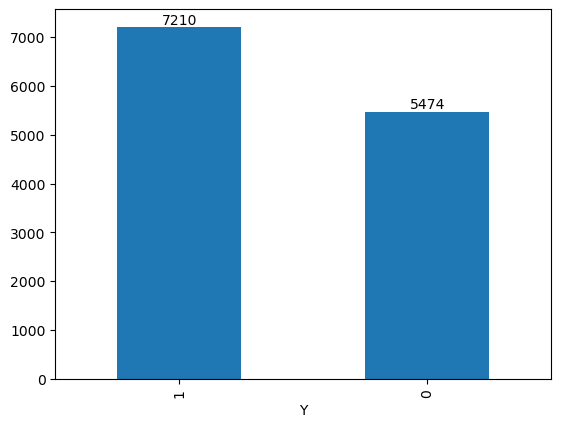

In [44]:
ax=vehicle.Y.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

# preprocessing

In [45]:
vehicle

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,1,0


In [46]:
vehicle.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [47]:
numcols=vehicle.select_dtypes(include=np.number)
objcols=vehicle.select_dtypes(include='object')

In [48]:
objcols.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
objcols=objcols.astype(str).apply(LabelEncoder().fit_transform)

In [51]:
numcols.head()

,Y
0,1
1,0
2,1
3,0
4,0


In [52]:
combine_df=pd.concat([numcols,objcols],axis=1)

In [53]:
combine_df.head()

,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,1,0,2,1,2,4,0,0,0,...,3,4,4,0,1,0,0,0,0,1
1,0,1,1,2,2,0,2,1,0,0,...,3,4,4,0,1,0,0,0,0,1
2,1,1,1,2,2,0,1,1,0,0,...,3,4,4,0,1,0,1,0,0,1
3,0,1,1,2,2,2,2,1,0,0,...,3,4,4,0,1,0,1,0,0,1
4,0,1,1,2,2,2,2,0,0,0,...,3,4,4,0,1,0,1,0,0,1


In [54]:
combine_df.replace({True:1,False:0},inplace=True)

In [55]:
combine_df.head()

,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,1,0,2,1,2,4,0,0,0,...,3,4,4,0,1,0,0,0,0,1
1,0,1,1,2,2,0,2,1,0,0,...,3,4,4,0,1,0,0,0,0,1
2,1,1,1,2,2,0,1,1,0,0,...,3,4,4,0,1,0,1,0,0,1
3,0,1,1,2,2,2,2,1,0,0,...,3,4,4,0,1,0,1,0,0,1
4,0,1,1,2,2,2,2,0,0,0,...,3,4,4,0,1,0,1,0,0,1


In [56]:
y=combine_df.Y
X=combine_df.drop('Y',axis=1)

In [57]:
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,1,2,4,0,0,0,3,...,3,4,4,0,1,0,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,4,4,0,1,0,0,0,0,1
2,1,1,2,2,0,1,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
4,1,1,2,2,2,2,0,0,0,3,...,3,4,4,0,1,0,1,0,0,1


# GBM

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc=GradientBoostingClassifier(n_estimators=1000,max_depth=4)

In [60]:
gbcmodel=gbc.fit(X,y)

In [61]:
gbcmodel.score(X,y)

0.86959949542731

In [62]:
gbcpredict=gbcmodel.predict(X)

In [63]:
pd.crosstab(y,gbcpredict)

col_0,0,1
Y,,
0,4422,1052
1,602,6608


In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
cross_val_score(gbcmodel,X,y)

array([0.67757194, 0.64446196, 0.62435948, 0.65195112, 0.66403785])

In [66]:
np.mean([0.68230193, 0.65273946, 0.62199448, 0.65825778, 0.68335962])

0.659730654

In [67]:
from sklearn.metrics import classification_report,RocCurveDisplay

In [68]:
print(classification_report(y,gbcpredict))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      5474
           1       0.86      0.92      0.89      7210

    accuracy                           0.87     12684
   macro avg       0.87      0.86      0.87     12684
weighted avg       0.87      0.87      0.87     12684



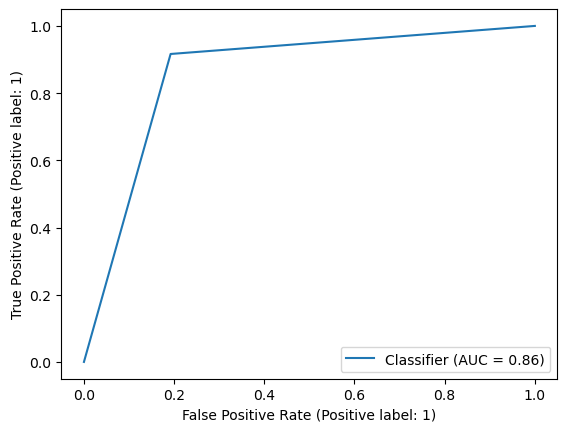

In [69]:
RocCurveDisplay.from_predictions(y,gbcpredict)

In [70]:
import pickle

In [71]:
pickle.dump(gbc,open('gbmmodel.pkl','wb'))#wb- meanas write

In [72]:
pickle_model=pickle.load(open('gbmmodel.pkl','rb'))# rb - means read